In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mobipy.plotting as mplt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/nivafjord_simplyq_model.txt', 
                                                              '../models/data/NIVAFjord/nivafjord_drammen.dat')

Overriding property "Cloud cover" with an input series.
Overriding property "Air pressure" with an input series.



In [3]:
app.start_date[()] = '2018-01-01'
app.end_date[()] = '2019-12-01'
app.run()

True

In [4]:

# Extract slices of the temperature and salinity results.

temp, dates = app.layer.water.temp["Drammensfjorden", :18]
sal,  dates = app.layer.water.salinity["Drammensfjorden", :18]

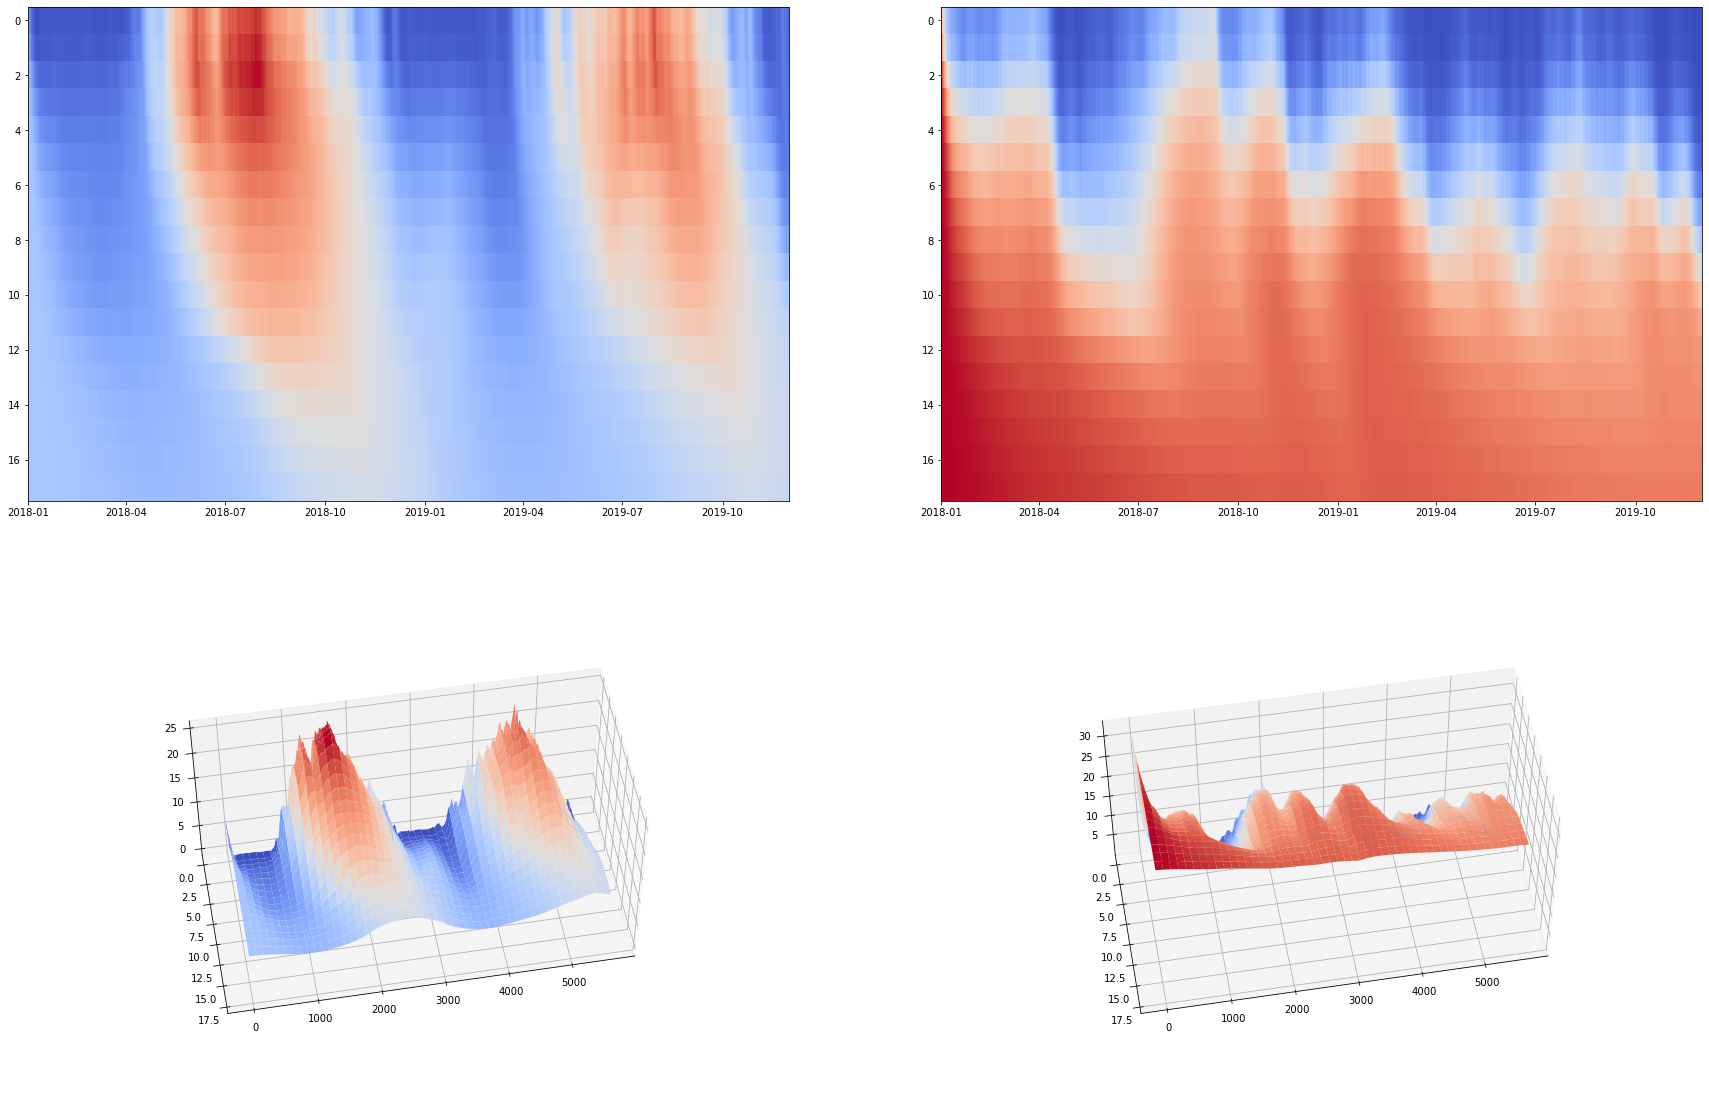

In [5]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(30, 20))
ax2.remove()
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.remove()
ax3 = fig.add_subplot(2, 2, 4, projection='3d')

ys = range(temp.shape[1])   #TODO: Should instead allow slice extraction of 'depth' parameter or something like that.

mplt.quick_heatmap(ax0, temp, dates, ys)
mplt.quick_heatmap(ax1, sal, dates, ys)

mplt.quick_surf(ax2, temp, dates, ys)
mplt.quick_surf(ax3, sal, dates, ys)

Text(0, 0.5, '[m³ s⁻¹]')

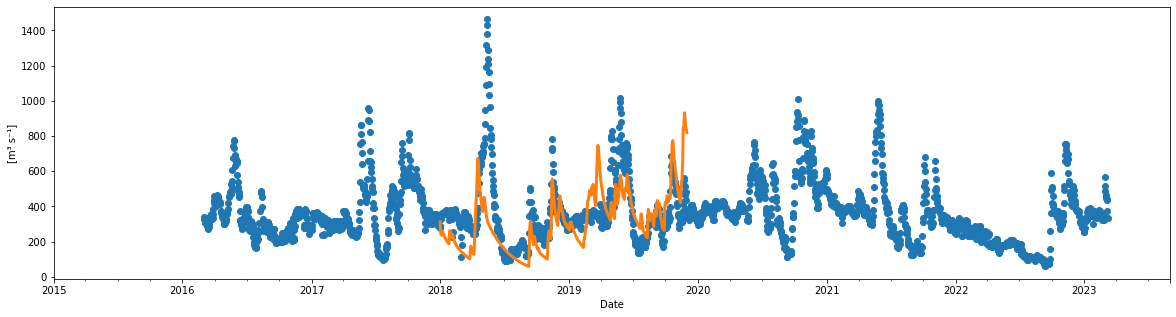

In [9]:
modq = app.var("River discharge to fjord")
obsq = app.var("Obs Q Mjondalen")
fig, ax = plt.subplots(1, figsize=(20, 5))
obsq[()].plot(ax = ax, marker='o')
modq["Drammenselva"].plot(ax = ax, linewidth=3)
ax.set_ylabel('[' + flow.unit() + ']')